# Modelos de Regresión Lineal 


## Modelo con datos simulados

* y=a+b*x
* x = 100 valores distribuidos según una N (1.5, 2.5)
* ye = 5+1.9*x + e (error) 
* e = estará distribuida según una normal N(0,0.8)

In [46]:
import pandas as pd 

In [47]:
import numpy as np 
import matplotlib.pyplot as plt

In [48]:
x=1.5+2.5*np.random.randn(100)

In [49]:
#este es el error
res=0+0.8*np.random.randn(100)

In [50]:
y_pred=5+1.9*x

In [51]:
y_act=5+1.9*x + res

In [52]:
x_list = x.tolist()
y_pred_list= y_pred.tolist()
y_act_list = y_act.tolist()

In [53]:
data = pd.DataFrame(
    {
        "x": x_list, 
        "y_actual": y_act_list,
        "y_prediccion": y_pred_list
    }
)

In [54]:
data.head()

,x,y_actual,y_prediccion
0,-0.488944,2.734001,4.071007
1,-4.051476,-2.600463,-2.697804
2,-1.318708,2.778484,2.494455
3,1.248681,6.431919,7.372494
4,1.823078,7.922952,8.463847


Text(0, 0.5, 'Valor actual')

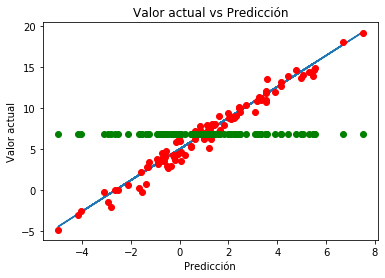

In [55]:
%matplotlib inline
y_mean =[np.mean(y_act) for i in range(1, len(x_list)+1)]
plt.plot(x,y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean, "go")
plt.title("Valor actual vs Predicción")
plt.xlabel("Predicción")
plt.ylabel("Valor actual")


In [56]:
#SSD es la distancia con respecto a la regresión
#SST es la distancia con respecto al promedio 
#SSR es la distancia del promedio y la regresión 
#SST=SSR+SSD es el ERROR TOTAL COMETIDO. 
#Lo que más importa es que SST sea grande y SSD sea pequeño
#El error aleatorio sea poco con comparación al error total
#R cuadrado = SSR/SST (siempre será más pequeño que 1)
#Hay otros factores y buen indicador de que el modelo es efectivo 


In [57]:
data["SSR"]=(data["y_prediccion"]-np.mean(y_act))**2
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-np.mean(y_act))**2

In [58]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,-0.488944,2.734001,4.071007,7.937680,1.787585,17.258997
1,-4.051476,-2.600463,-2.697804,91.895238,0.009475,90.038449
2,-1.318708,2.778484,2.494455,19.306721,0.080672,16.891380
3,1.248681,6.431919,7.372494,0.234351,0.884680,0.208371
4,1.823078,7.922952,8.463847,2.482047,0.292568,1.070306


In [59]:
SSR =sum(data["SSR"])
SSD=sum(data["SSD"])
SST=sum(data["SST"])

In [60]:
SSR

2095.2831311446394

In [61]:
SSD

63.318485179358525

In [62]:
SST

2161.828846195339

In [63]:
SSR+SSD

2158.601616323998

In [64]:
R2=SSR/SST
R2

0.9692178614566018

In [65]:
#el error aleatorio es pequeño 
#condiciones la suma de los cuadrados de diferencia normal
#distribución normal 

(array([ 1.,  5., 13., 18., 22., 17., 10.,  8.,  4.,  2.]),
 array([-1.72927341, -1.33028967, -0.93130593, -0.53232219, -0.13333845,
         0.26564529,  0.66462902,  1.06361276,  1.4625965 ,  1.86158024,
         2.26056398]),
 <a list of 10 Patch objects>)

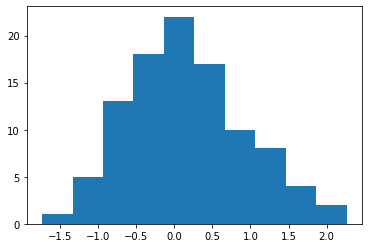

In [67]:
plt.hist((data["y_prediccion"]-data["y_actual"]))
#SSD si sigue una distribución normal 

# Obteniendo los valores de la regresión 

* y=a+b*x
* b=sum(xi-x_m)*yi-y_m)/sum(xi-x_m)^2)
* a=y_m-b*x_m 

In [72]:
x_mean=np.mean(data["x"])
y_mean=np.mean(data["y_actual"])
x_mean, y_mean #raya verde horizontal

(1.0831126862434652, 6.888395932394583)

In [73]:
data["beta_n"]=(data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"]=(data["x"]-x_mean)**2

In [74]:
beta=sum(data["beta_n"])/sum(data["beta_d"])

In [75]:
alpha=y_mean-beta*x_mean

In [77]:
alpha, beta
#alpha era 5, y beta era 1,9 el modelo sí funciona. 

(4.826068549288345, 1.9040746261212769)

Modelo lineal obtenido por regresión 
y=4.826068549288345 x + 1.9040746261212769

In [78]:
data["y_model"]=alpha+beta*data["x"]

In [79]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,-0.488944,2.734001,4.071007,7.937680,1.787585,17.258997,6.530943,2.471361,3.895083
1,-4.051476,-2.600463,-2.697804,91.895238,0.009475,90.038449,48.721389,26.364001,-2.888244
2,-1.318708,2.778484,2.494455,19.306721,0.080672,16.891380,9.871273,5.768743,2.315150
3,1.248681,6.431919,7.372494,0.234351,0.884680,0.208371,-0.075578,0.027413,7.203650
4,1.823078,7.922952,8.463847,2.482047,0.292568,1.070306,0.765535,0.547548,8.297344


In [93]:
SSR=sum((data["y_model"]-y_mean)**2)
SSD=sum((data["y_model"]-data["y_actual"])**2)
SST=sum((data["y_actual"]-y_mean)**2)

In [94]:
SSR, SSD, SST

(2101.393625161993, 60.435221033344035, 2161.828846195339)

In [95]:
R2 = SSR/SST 
R2

0.9720444006750546

In [96]:
#ha mejorado un poco, la mejor forma de verlo es con un gráfico. 

Text(0, 0.5, 'Valor actual')

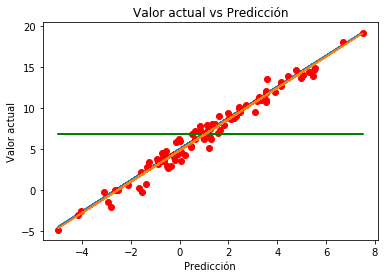

In [97]:
%matplotlib inline
y_mean =[np.mean(y_act) for i in range(1, len(x_list)+1)]
plt.plot(data["x"], data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"], y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor actual vs Predicción")
plt.xlabel("Predicción")
plt.ylabel("Valor actual")

In [98]:
#la línea naranja y la azul están muy cercanas pero igual funcionan 

Tenemos H0 : beta=0 
H1 : beta diferente de 0 
El estadístico F, hace una regresión múltiple cada una de las x tiene una beta, también es un requisito comprobar si hay un contraste de hipótesis. El estadístico de llama F 
F= SSR/k/SSD/(n-k-1), k es la p. Número de variables predictoras del modelo. Con el estadístico de Fischer si es más pequeño que la hipótesis nula puede ser rechazada. 
El error estándar residual, suma del cuadrado de la diferencia sobre n-2 
* RSE= sqrt(SSD/(n-2))  para la simple 
* RSE= sqrt(SSD/(n-k-1)) para la múltiple, k número de variables predictorias. 


In [99]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.7852935304150123

In [100]:
np.mean(data["y_actual"])

6.888395932394583

In [101]:
RSE/np.mean(data["y_actual"])

0.11400237996221337

In [102]:
#se observa un error del 11,4 % debido al uso del modelo. 
#para validar si el modelo funciona cómo es debido. 